<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/main/Exercises/day-6/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETL Lab Exercise: Wine Quality Dataset

## Problem Statement

In this exercise, you will build an end-to-end ETL (Extract-Transform-Load) pipeline using the public "Wine Quality" dataset from the UCI Machine Learning Repository. All work will be done in Google Colab using only local resources.

---

## Tasks

### 1. Extract
- **Download:**  
  Download the "Wine Quality - Red" dataset directly from this URL:  
  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
- **Load:**  
  Load the CSV file into a pandas DataFrame, specifying the separator (`;`).

### 2. Transform
- **Clean:**  
  - Check for and handle any missing or anomalous values.
  - Rename columns for better readability, if desired.
- **Feature Engineering:**  
  - Classify each wine as "High Quality" if its `quality` score is 7 or higher, otherwise "Low/Medium Quality."
  - Normalize numerical features for further analysis.
  - (Optional) Create a feature representing the sum of acidity levels (`fixed acidity` + `volatile acidity`).

### 3. Load
- **SQLite Storage:**  
  Store the transformed DataFrame into a local SQLite database in Colab.
- **SQL Queries:**  
  - Count the number of high and low/medium quality wines.
  - Find the average alcohol percentage by wine quality group.
  - Identify the top 5 wines (rows) with the highest alcohol content.

---

## Constraints

- Use only pandas, Python standard library, and SQLite—all within Google Colab.
- Do **not** use any external or cloud database services.

---

## Dataset

- **Wine Quality Red CSV:**  
  [https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)

---

## Example Challenge Questions

- What percentage of red wines are classified as high quality?
- Which parameter most strongly correlates with wine quality in this sample?
- What is the distribution of alcohol content among different quality groups?

---

**Expected Outcome:**  
You’ll successfully practice ETL skills on a benchmark dataset: from real-world-style data ingestion, cleaning, and enrichment, to local SQL storage and querying for analytics—all inside Colab.

In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
total_acidity           0
dtype: int64


In [19]:
#rename columns for consistency
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [4]:
# Classify wine as 'High Quality' (quality >= 7) or 'Low/Medium Quality'
df['quality_label'] = df['quality'].apply(lambda x: 'High Quality' if x >= 7 else 'Low/Medium Quality')

# Normalize numerical features (min-max normalization)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(['quality'])
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Create 'total_acidity' = fixed acidity + volatile acidity
df['total_acidity'] = df['fixed_acidity'] + df['volatile_acidity']

In [5]:
import sqlite3

# Connect to SQLite in-memory or file
conn = sqlite3.connect('wine_quality.db')

# Save DataFrame to SQL table
df.to_sql('wine_red', conn, if_exists='replace', index=False)

1599

Count the number of high and low/medium quality wines.

In [6]:
query = """
SELECT quality_label, COUNT(*) AS count
FROM wine_red
GROUP BY quality_label
"""
print(pd.read_sql(query, conn))

        quality_label  count
0        High Quality    217
1  Low/Medium Quality   1382


 Average alcohol percentage by wine quality group.

In [7]:
query = """
SELECT quality_label, ROUND(AVG(alcohol), 3) AS avg_alcohol
FROM wine_red
GROUP BY quality_label
"""
print(pd.read_sql(query, conn))

        quality_label  avg_alcohol
0        High Quality        0.480
1  Low/Medium Quality        0.285


Top 5 wines (rows) with the highest alcohol content.

In [8]:
query = """
SELECT * FROM wine_red
ORDER BY alcohol DESC
LIMIT 5
"""
print(pd.read_sql(query, conn))

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       1.000000          0.164384         0.65        0.452055   0.140234   
1       0.053097          0.150685         0.00        0.061644   0.063439   
2       0.053097          0.150685         0.00        0.061644   0.063439   
3       0.371681          0.232877         0.45        0.116438   0.088481   
4       0.035398          0.205479         0.24        0.075342   0.080134   

   free_sulfur_dioxide  total_sulfur_dioxide   density        ph  sulphates  \
0             0.295775              0.229682  0.552863  0.188976   0.305389   
1             0.366197              0.201413  0.112335  0.740157   0.275449   
2             0.366197              0.201413  0.112335  0.740157   0.275449   
3             0.084507              0.042403  0.339941  0.456693   0.275449   
4             0.253521              0.155477  0.119677  0.771654   0.245509   

    alcohol  quality       quality_label  total_acidity 

# **Example Challenge Questions**

In [9]:
percent_high_quality = (df['quality_label'].value_counts(normalize=True)['High Quality']) * 100
print(f"Percentage of high quality wines: {percent_high_quality:.2f}%")

Percentage of high quality wines: 13.57%


In [11]:
correlations = df.select_dtypes(include=['float64', 'int64']).corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
ph                     -0.057731
chlorides              -0.128907
total_acidity          -0.168739
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64


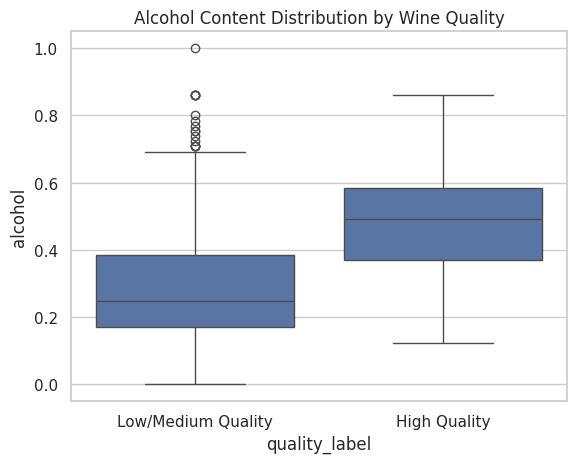

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='quality_label', y='alcohol', data=df)
plt.title("Alcohol Content Distribution by Wine Quality")
plt.show()

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

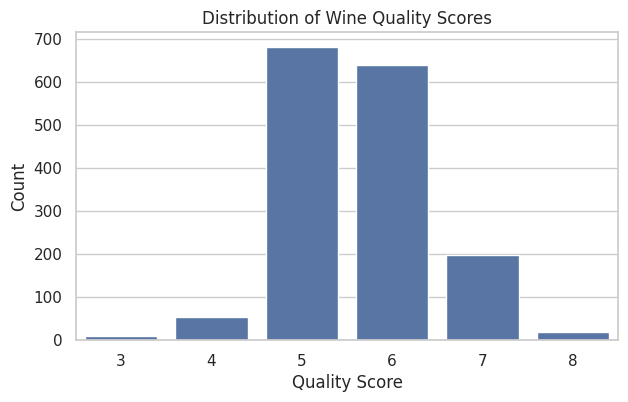

In [25]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='quality')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-2500342268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='quality_label', palette='pastel')


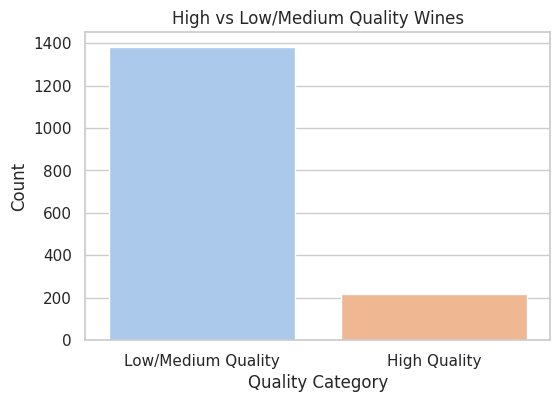

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='quality_label', palette='pastel')
plt.title('High vs Low/Medium Quality Wines')
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.show()